<a href="https://colab.research.google.com/github/joseph-c-mcguire/Portfolio/blob/main/Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Gradient Descent

In batch gradient descent, we seek to find $\theta^*$ such that:

$$\theta^* = \arg \min_{\theta} J(\theta)$$
Where function $J(\theta)$ is some cost function.

In the case of linear regression,is cost function is defined as the squared mean error, for some data training set $\{(x^{(i)}, y^{(i)}) : i = 1,\ldots, m\}$ and $h_{\theta}(x) = \theta^T x$:
$$J(\theta) = \dfrac{1}{2m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)} )^2$$
For a general cost function, that we hope to minimize over $\theta$:
$$\theta:= \theta - \alpha ∇_{\theta}J(\theta).$$
In general, we can approximate the derivative above via difference quotient.
However, in a simple enough case, we don't need to do this.

Batch gradient descent gives us a way of finding at least a local minimum via the following:
$$\theta := \theta - \alpha \sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}$$
where we use the vectorized notation: $\theta = \{\theta_0, \theta_1, \ldots, \theta_m\}$ and we let $x_0 = 1$.
We implement that below:

# Stochastic Gradient Descent

In **stochastic gradient descent**, we can deal with a very large training set.
Where $m >> 1$.
In this case, we adjust our parameters one-by-one by the training set.
That is, we have an update rule of:
$$\theta := \theta - \alpha(\theta^{T}x^{(i)} - y^{(i)})x^{(i)},$$
where again we use a vectorized notation of $(x^{(i)},y^{(i)}) \in X$, where $X$ is our training set. 
Futhermore, it's necessary to shuffle the training set $(x^{(i)}, y^{(i)})$ to prevent any unnecessary bias.

In [ ]:
from pandas.core.accessor import delegate_names
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Linear Fit
def h(theta,x):
  return np.dot(np.transpose(theta),x)

def gradient_descent(x,y,error_tolerance,guesses,alpha, mode):
  ## Inputs
  # x,y:             is your training data
  # error_tolerance: is your error thresehold
  # guesses:         is the number of random initializations for theta
  # alpha:           is the learning rate
  ## Outputs
  # theta:           predictor parameters
  N = len(x[:,0]) # size of training set
  d = len(x[0,:]) # number of features
  x = np.insert(x,0,np.transpose(np.ones(shape=(N,1))),axis=1)

  for i in range(guesses):
    theta = np.random.rand(d+1,1)

    delta = 1
    if mode.upper() == "B":
      while delta > error_tolerance:
        grad = np.zeros(shape=(d+1,1))
        for j in range(N):
          grad += (y[j].reshape(1,1) - h(theta,x[j].reshape(d+1,1)))*x[j].reshape(d+1,1)
        theta_old = theta
        theta_new = theta + alpha*grad
        theta = theta_new
        delta = np.dot(np.transpose(theta_new - theta_old), theta_new - theta_old)/2
  
    if mode.upper() == "S":
      while delta > error_tolerance:
        theta_old = theta
        j = np.random.randint(0,N)
        grad = np.zeros(shape=(d+1,1))
        grad = (y[j].reshape(1,1) - h(theta,x[j].reshape(d+1,1)))*x[j].reshape(d+1,1)
        theta = theta + alpha*grad    
        theta_new = theta
        delta = np.dot(np.transpose(theta_new - theta_old), theta_new - theta_old)/2

  return theta
## Initialize "data set"
# Size of Training Set
N = 100
# Number of Features
d = 1
# Initialize Design Matrix
x = np.random.rand(N,d)
# Initilaize Predictor variables
y = 1.6 * np.random.rand(N,1) + np.random.rand(N,1)

## Run Gradient
theta_B = gradient_descent(x,y,10**(-10),1,0.1,'B')
theta_S = gradient_descent(x,y,10**(-10),1,0.1,'S')

# Sci-py results
# (slope, intercept, r_value, p, stdev) = stats.linregress(np.transpose(x),np.transpose(y))
# Plot
# x_lin = np.linspace(0,1)
# x_lin = x_lin.reshape(1,len(x_lin))
# f_grad_B = x_lin * (theta_B[1]) + theta_B[0]
# f_grad_S = x_lin * theta_S[1] + theta_S[0]
# f_optimal = slope * x_lin + intercept
# plt.plot(x_lin[0,:], f_grad_B[0,:])
# plt.plot(x_lin[0,:], f_grad_S[0,:])
# plt.plot(x[:,0],y[:,0],'o')
# plt.plot(x_lin[0,:], f_optimal[0,:])
# plt.legend(["Batch", "Stochastic","Data", "optimal"])

# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in add


# Sklearn Function for Linear Regression 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = np.random.rand(100,10)
y = np.random.rand(100,1)
reg = LinearRegression().fit(x,y)
# R^2 score, the fitness of the line
print(reg.score(x,y))
# Prints the coefficients of the features, your theta values
print(reg.coef_)
# Print the intercept of the model
print(reg.intercept_)

# plt.plot(x,y, 'o')
# line_x = np.linspace(0,1)
# f = reg.coef_[0] * line_x + reg.intercept_
# plt.plot(line_x, f)

0.09662445363270733
[[ 0.094733    0.01250215  0.02880875  0.17103468  0.01109464  0.12400183
   0.05481534 -0.14660841  0.1371068   0.08136603]]
[0.24865712]


# Locally Weighted Linear Regression

In **locally weighted linear regression** we introduce our first non-parametric learning algorithm; that is, an algorithm that is determined by the point in which you want to extrapolate. It goes as follows, introduce a weight term to the squared error terms:
$$f = \sum_{i = 1}^{d} w^{(i)} (h_{\theta}(x^{(i)}) - y^{(i)})^2,$$
where $w^{(i)} = w^{(i)}(x^{(i)},x)$; that is, it's a weight function that depends on the point of extrapolation $x$ and training point $x^{(i)}$.
We still seek to minimize this with respect to $\theta$. Our worked example will let: 

$$w^{(i)} = \exp\left(\dfrac{-(x^{(i)} -x)^2}{2 \tau^2}\right)$$

Where, $\tau$ determines the bandwidth of this 'Gaussian' (Note: this is not a proper Gaussian, as it does not integrate to $1$ on $\mathbb{R}$.)
So the steps we wish to follow are:

1.) Minimize $f$, with respect to $\theta$. (Using gradient descent or Netwon's method as we'll introduce in the next section.)

2.) Our output, and predictor function will be $\theta^T x$.

Using batch Gradient Descent, the update rule will be:

$$\theta := \theta - \alpha \sum_{i = 1}^d w^{(i)}(\theta^T x^{(i)} - y^{(i)}) x^{(i)} \qquad w^{(i)} = \exp\left(\dfrac{-(x^{(i)} - x)^2}{2 \tau^2}\right)$$

for a vectorized problem we'll let:

$$w^{(i)} = \exp \left(\dfrac{-(x^{(i)} - x)^T(x^{(i)} - x)}{2 \tau^2}\right)$$

Just as in the case of linear regression, there is closed optimal solution to this (assuming $w^{(i)} \neq 0$ and X^T X is invertible).
If we let $X$ be the design matrix, that is the $X = [\ldots x^{(i)} \ldots]$ for $i = 1, \ldots, n$, then with the normal equations we had with the normal equations that the optimal $\theta$ is always:
$$\theta = (X^T X)^{-1} X^{T} y,$$
where $y$ is the vector of our predictor variables.
First we'll define the weight matrix by:
$$W_{i,j} = w^{(i)} \qquad \text{if } i = j $$

$$W_{i,j} = 0 \qquad\text{otherwise}$$

So this is a diagonal matrix, where the $i^{th}$ diagonal entry is the weight $w^{(i)}$.
With this formulation we have that our cost function is:
$J(\theta) = \dfrac{1}{2}(XW\theta - y)^{T} (XW \theta - y)$.
With a similar derivation of setting $\nabla_{\theta} J(\theta) = 0$, we find that:
$$X^{T} W X\theta - X^{T} W y = 0 \iff \theta = (X^T W X)^{-1} (X^T W y).$$

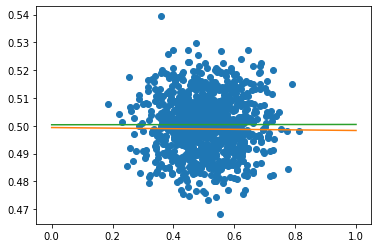

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Size of Training Set
N = 1000
# Number of Features
d = 1
# Number of Iterations
iterations = 100
# Initialize Design Matrix
x = np.random.normal(loc = 0.5, scale = 0.1, size=(N,d + 1))
x[:,0] = 1
x_bar = np.linspace(0,1)

# Initilaize Predictor variables
y = np.random.normal(loc = 0.5, scale = 0.01, size = (N,1))
theta = np.ones(shape=(d+1, 1), dtype=object)
# Initialize Learning Rate
alpha = 0.1
# Draw Scatter Plot
plt.plot(x[:,1], y, 'o')

tau = 0.01

optimal_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)), np.transpose(x)),y)

for n in range(iterations):
  for i in range(N):
    for j in range(d + 1):
      theta[j] -= alpha*(np.dot(np.transpose(theta),x[i]) - y[i,0])*x[i,j]


f_grad = (theta[1]*x_bar + theta[0])
f_optimal = (optimal_theta[1]*x_bar + optimal_theta[0])

plt.plot(x_bar,f_grad)
plt.plot(x_bar, f_optimal)

# Logistic Regression

In logistic regression, we most often deal with a problem of binary classification.
That is, $y^{(i)} = \{0,1\}$ and $x^{(i)}$ is continuous still.
For example a spam filter and $x^{(i)}$ might be some characteristics of the email.

Then the model to fit is:
$$h_\theta(x) = \dfrac{1}{1 + e^{-\theta^T x}},$$
where $\theta^T x = \theta_0 + \sum\limits_{i = 1}^{N} \theta_i x_i$ wher $N$ is the number of our features.
Then through a maximum likelihood estimation we get that:
$$\theta_j := \theta_j + \alpha (y - h_{\theta}(x^{(i)}) x_j,$$
where $h_\theta(x)$ is as defined above.
This is by no coincidence the same form of linear regression!

[[0.12734972964843655]
 [0.07544910410917749]]


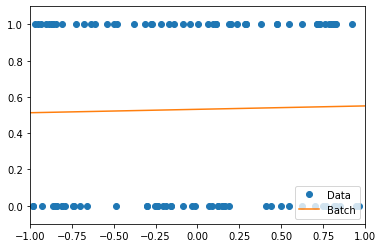

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Size of Training Set
N = 100
# Number of Features
d = 1
# Number of Iterations
iterations = 100
# Initialize Design Matrix
x = np.random.uniform(-1,1, size= (N,d + 1))
x[:,0] = 1

def h_theta(parameters, data):
  return (1 / (1 + np.exp(-1 * float(parameters) * float(data))))

# Initilaize Predictor variables
y = np.random.randint(2, size = (N,1))
x_bar = np.linspace(-1,1)

theta = np.ones(shape=(d+1, 1), dtype=object)
# Initialize Learning Rate
alpha = 0.01
# Draw Scatter Plot
plt.plot(x[:,1], y[:,0], 'o')

for n in range(iterations):
  for i in range(N):
    for j in range(d + 1):
      theta[j] += alpha*(-h_theta(theta[j], x[i,j]) + float(y[i,0]))*x[i,j]

print(theta)

f_grad = 1 / (1 + np.exp(- float(theta[0]) - float(theta[1])*x_bar))
plt.plot(x_bar,f_grad)
plt.axis([-1,1,-0.1,1.1])
plt.legend(["Data", "Batch"])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_housing_train = pd.read_csv(r'/content/sample_data/california_housing_train.csv')

# Number of Iterations
iterations = 100
# Learning Rate
alpha = 0.1
# Type of GLM trying to fit
def g(theta, x):
  return np.dot(theta.T, x)

# Establish Training Examples
x = df_housing_train.iloc[:,:8]
y = df_housing_train["median_house_value"]
# Number of Training Examples
N = df_housing_train.shape[0]
d = df_housing_train.shape[1]

x = x.to_numpy()
y = y.to_numpy()

x_temp = np.ones((N,d+1))
x_temp[:,2:] = x
x = x_temp


theta = np.ones(shape=(d+1))
theta_bgd = theta
theta_sgd = theta
# Optimize using batch gradient descent
for n in range(iterations):
  for i in range(N):
    for j in range(d + 1):
      theta_bgd[j] -= alpha*(g(theta_bgd, x[i]) - y[i])*x[i,j]
# Error Analysis

error = np.ones(N)
for n in range(N):
  error[n] = (g(theta_bgd, x[n]) - y[n])
print(x,error,y, theta_bgd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in double_scalars


[[ 1.0000e+00  1.0000e+00 -1.1431e+02 ...  1.0150e+03  4.7200e+02
   1.4936e+00]
 [ 1.0000e+00  1.0000e+00 -1.1447e+02 ...  1.1290e+03  4.6300e+02
   1.8200e+00]
 [ 1.0000e+00  1.0000e+00 -1.1456e+02 ...  3.3300e+02  1.1700e+02
   1.6509e+00]
 ...
 [ 1.0000e+00  1.0000e+00 -1.2430e+02 ...  1.2440e+03  4.5600e+02
   3.0313e+00]
 [ 1.0000e+00  1.0000e+00 -1.2430e+02 ...  1.2980e+03  4.7800e+02
   1.9797e+00]
 [ 1.0000e+00  1.0000e+00 -1.2435e+02 ...  8.0600e+02  2.7000e+02
   3.0147e+00]] [nan nan nan ... nan nan nan] [ 66900.  80100.  85700. ... 103600.  85800.  94600.] [nan nan nan nan nan nan nan nan nan nan]


## Linear Regression

Linear regression deals with fitting a straight line to a data set

Text(0.5, 1.0, 'R^2 = 1.0')

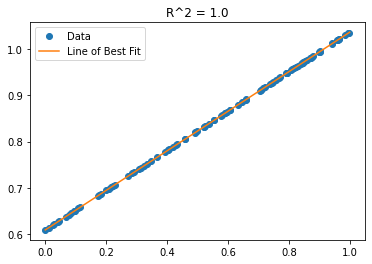

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Size of Training set
N = 100
# Number of Features
d = 1
x = np.random.rand(N,d)
y = np.dot(x, np.random.rand(1,d)) + np.random.rand(1,d)
plt.plot(x,y,'o')

reg = LinearRegression().fit(x,y)
reg.score(x,y)
reg.coef_
reg.intercept_
x_line = np.linspace(0,1)
plt.plot(x_line.reshape(-1,1), reg.coef_ * x_line.reshape(-1,1) + reg.intercept_)
plt.legend(["Data", "Line of Best Fit"])
plt.title("R^2 = " + str(reg.score(x,y)))

## Locally Weighted Linear Regression

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ] [2.29950666 2.34103983 2.38257299 2.42410615 2.46563932 2.50717248
 2.54870564 2.5902388  2.63177197 2.67330513 2.71483829 2.75637146
 2.79790462 2.83943778 2.88097095 2.92250411 2.96403727 3.00557044
 3.0471036  3.08863676 3.13016993 3.17170309 3.21323625 3.25476941
 3.29630258 3.33783574 3.3793689  3.42090207 3.46243523 3.50396839
 3.54550156 3.58703472 3.62856788 3.67010105 3.71163421 3.75316737
 3.79470054 3.8362337  3.87776686 3.919

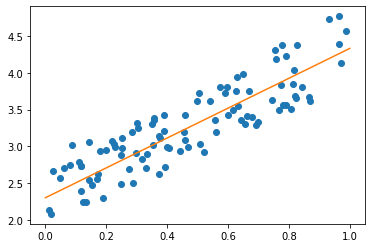

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def weight_matrix(x,train,sigma):
  M = train.shape[0]
  W = np.mat(np.eye(M))
  for i in range(M):
    x_i = train[i]
    denominator = -2 * sigma * sigma
    W[i,i] = np.exp(np.dot((x_i - x).T, (x_i - x))/denominator)
  return W 

    

# Size of Training set
N = 100
# Number of Features
d = 1
x = np.random.rand(N,d+1)
x[:,0] = 1
y = np.dot(x**2, np.ones(shape=(d+1,1))) + np.dot(x, np.ones(shape=(d+1,1))) + np.random.rand(N,1)
W = weight_matrix(0.5,x,0.1)

theta = np.linalg.inv(x.T @ W @ x) @ (x.T @ W @ y)

x_lin = np.linspace(0,1)
print(x_lin, theta[1,0] * x_lin + theta[0,0])
plt.plot(x[:,1],y,'o')
plt.plot(x_lin, theta[1,0] * x_lin + theta[0,0])


# Scikit SVM's

Support vector machines are good with dealing with classification problems, that is we want to label data accordingly

[5.1 3.5]


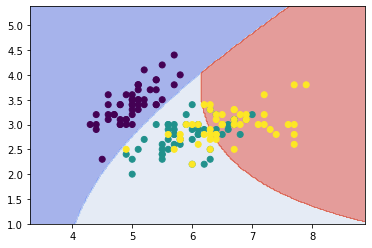

In [ ]:
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
# Design Matrix
X = datasets.load_iris().data[:,:2]
# Labels
y = datasets.load_iris().target

h = 0.02 
print(X[:][0])
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
clf = svm.SVC(kernel = 'poly',gamma=0.5, C = 0.1).fit(X,y)

plt.subplots_adjust(wspace=0.4,hspace=0.4)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha = 0.5)


plt.scatter(X[:,0], X[:,1],c=y, cmap = plt.cm.viridis)